In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle



In [11]:
df = pd.read_csv("/home/poyraden/Analysis/JOSIEfiles/Proccessed/Josie9602_Data.csv", low_memory=False)
dfnd = df.drop_duplicates(['Sim','Team'])
# dfnd[dfnd.SondeTypeNr==0][['JOSIE_Nr', 'Sim', 'Team', 'SST_Nr', 'SondeTypeNr']]
dfnd[dfnd.SST_Nr==5]

,Unnamed: 0,Unnamed: 0.1,JOSIE_Nr,Tsim,Sim,Team,ENSCI,Sol,Buf,Pair,...,I_OPM,I_OPM_jma,I_conv_slow,PFcor,R1_Tstart,R1_Tstop,R2_Tstart,R2_Tstop,SST_Nr,SondeTypeNr


In [ ]:
df[df.Tsim > 2110][['Pair','Tsim','IM','I_conv_slow','I_OPM','I_OPM_jma','PO3_OPM','PO3','TPint']]

In [ ]:
df = df[(df.Sim == 98) & (df.Team ==6)]
df.reset_index(inplace = True)
# dft = dft.reset_index()
df[df.Tsim > 1410][['Pair','Tsim','IM','I_conv_slow','I_OPM','I_OPM_jma','PO3_OPM','TPint']]

In [ ]:
df[['Pair','R1_Tstart', 'R1_Tstop', 'R2_Tstart', 'R2_Tstop', 'SST_Nr', 'SondeTypeNr','I_OPM', 'I_OPM_jma']]

In [ ]:
size = len(df)
Ums_i = [0] * size
Ua_i = [0] * size
Ums_i[0] = df.at[0, 'IM']

slow = 25 * 60  # 25 minutes in seconds
fast = 25  # 25seconds

## only convolute slow part of the signal, which is needed for beta calculation
for i in range(10):

    Ua_i = df.at[i + 1, 'I_OPM_jma']
    t1 = df.at[i + 1,'Tsim']
    t2 = df.at[i,'Tsim']
    Xs = np.exp(-(t1 - t2) / slow)
    Xf = np.exp(-(t1 - t2) / fast)
    print(Ua_i, t1, t2, Xs, Xf)
    Ums_i[i + 1] = Ua_i - (Ua_i - Ums_i[i]) * Xs

df['I_conv_slow'] = Ums_i

In [ ]:
df['I_conv_slow']

[[ 70.03673039]
 [ 74.27508094]
 [ 70.92800107]
 [ 56.67455225]
 [ 97.77853328]
 [ 70.6334846 ]
 [ 24.79157587]
 [ 15.78833509]
 [ 69.76985214]
 [ 71.99566667]
 [ 25.77444303]
 [ 34.15467831]
 [ 96.87611677]
 [ 69.45070978]
 [ 46.63832593]
 [ 70.28126954]
 [ 51.1785874 ]
 [ 92.874137  ]
 [ 73.97692989]
 [ 62.24390337]
 [ 65.15454689]
 [ 39.68076115]
 [ 54.32393949]
 [ 79.98995282]
 [ 72.15447266]
 [ 29.53639811]
 [ 16.09458806]
 [ 20.61255148]
 [ 13.43253868]
 [ 48.06050174]
 [ 34.25218134]
 [ 36.29692901]
 [ 97.29176387]
 [ 11.09436116]
 [ 38.82640891]
 [ 78.30658753]
 [ 97.28972601]
 [ 48.32096053]
 [ 33.64211054]
 [ 56.74190362]
 [  4.79415097]
 [ 38.8937029 ]
 [ 90.63036451]
 [ 16.10182093]
 [ 74.36211347]
 [ 63.29741618]
 [ 32.41800177]
 [ 92.23765324]
 [ 23.72264387]
 [ 82.39455709]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.  

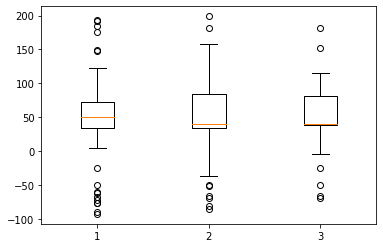

In [11]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
print(data[0])
print(data[1])

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()


[[ 70.03673039]
 [ 74.27508094]
 [ 70.92800107]
 [ 56.67455225]
 [ 97.77853328]
 [ 70.6334846 ]
 [ 24.79157587]
 [ 15.78833509]
 [ 69.76985214]
 [ 71.99566667]
 [ 25.77444303]
 [ 34.15467831]
 [ 96.87611677]
 [ 69.45070978]
 [ 46.63832593]
 [ 70.28126954]
 [ 51.1785874 ]
 [ 92.874137  ]
 [ 73.97692989]
 [ 62.24390337]
 [ 65.15454689]
 [ 39.68076115]
 [ 54.32393949]
 [ 79.98995282]
 [ 72.15447266]
 [ 29.53639811]
 [ 16.09458806]
 [ 20.61255148]
 [ 13.43253868]
 [ 48.06050174]
 [ 34.25218134]
 [ 36.29692901]
 [ 97.29176387]
 [ 11.09436116]
 [ 38.82640891]
 [ 78.30658753]
 [ 97.28972601]
 [ 48.32096053]
 [ 33.64211054]
 [ 56.74190362]
 [  4.79415097]
 [ 38.8937029 ]
 [ 90.63036451]
 [ 16.10182093]
 [ 74.36211347]
 [ 63.29741618]
 [ 32.41800177]
 [ 92.23765324]
 [ 23.72264387]
 [ 82.39455709]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.        ]
 [ 50.  

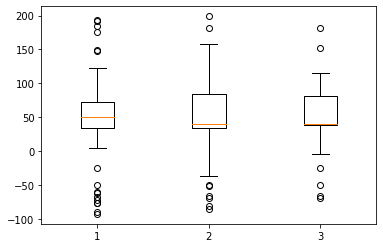